### Display and play audio IPython.display()

In [108]:
path= "/Users/saraabdelhafid/Desktop/My Kids Robot/Source Code/Speechy_Robot/IA/archive/Actor_01/03-01-01-01-01-02-01.wav"

In [109]:
#1 IPython.display(): Display and play audio IPython.display()
from IPython.display import Audio, display
display(Audio(path))

### Read Write in audio files SoundFile

In [110]:
#2 SoundFile: Read Write in audio files WAV, FLAC, OGG, MAT 
#pip install soundfile
import soundfile as sf

data, samplerate= sf.read(path)
print(data.shape, samplerate)
sf.write("/Users/saraabdelhafid/Desktop/My Kids Robot/Source Code/Speechy_Robot/IA/archive/new_file.wav",data, samplerate)
print(data)


(160160,) 48000
[ 0.00000000e+00  0.00000000e+00 -3.05175781e-05 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [111]:
# WAVE
import wave

#open wave file
obj = wave.open(path,'r')# read mode

print("number of channels", obj.getnchannels())
print("sample width", obj.getsampwidth())
print("frame rate", obj.getframerate())
print("number of frames", obj.getnframes())
print("parameters", obj.getparams())
frames = obj.readframes(obj.getnframes())
obj.close()



# write wave file
sample_rate = 16000.0 #hertz
obj= wave.open("/Users/saraabdelhafid/Desktop/My Kids Robot/Source Code/Speechy_Robot/IA/archive/new_wave_file.wav",'w')# write  mode
obj.setnchannels(1)#mono
obj.setsampwidth(2)
obj.setframerate(sample_rate)
obj.writeframes(frames)
obj.close()



number of channels 1
sample width 2
frame rate 48000
number of frames 160160
parameters _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=160160, comptype='NONE', compname='not compressed')


### PyAudio :I/O Library To Record From Microphone

In [112]:
import pyaudio #python bindings for PortAudio the cross_platform audio i/o  library
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate= RATE,
                input= True,
                frames_per_buffer=CHUNK)
print("Start Recording...")
frames = []
seconds = 3
for i in range(0, int(RATE/CHUNK *seconds)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Recording Stopped...")
stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("/Users/saraabdelhafid/Desktop/My Kids Robot/Source Code/Speechy_Robot/IA/archive/output.wav","wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()


Start Recording...
Recording Stopped...


### SoundDevice : Record Microphone , play audio

In [113]:
import sounddevice as sd #simpler but less controll then pyaudio

fs= 44100 #format rate
duration= 5.0

myrecording = sd.rec(int(duration*fs), samplerate=fs, channels=1)
sd.wait()
sd.play(myrecording, fs)

### PyDub manipulate audio .mp3 and other formats 

In [55]:
from pydub import AudioSegment

audio = AudioSegment.from_wav(path)
#boost volume by 6dB
audio= audio + 6

#repeat the clip twice
audio = audio * 2

# 2 sec fade in 
audio=audio.fade_in(2000)

audio.export("/Users/saraabdelhafid/Desktop/My Kids Robot/Source Code/Speechy_Robot/IA/archive/mashup.mp3",format="mp3")
display(Audio("/Users/saraabdelhafid/Desktop/My Kids Robot/Source Code/Speechy_Robot/IA/archive/mashup.mp3"))

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

In [56]:
#pip  install ffmpeg

Note: you may need to restart the kernel to use updated packages.


### librosa : library for audio analysis

In [114]:
import librosa

data, sr = librosa.load(path, sr=16000) #sample rate
print(data.shape, sr)

(53387,) 16000


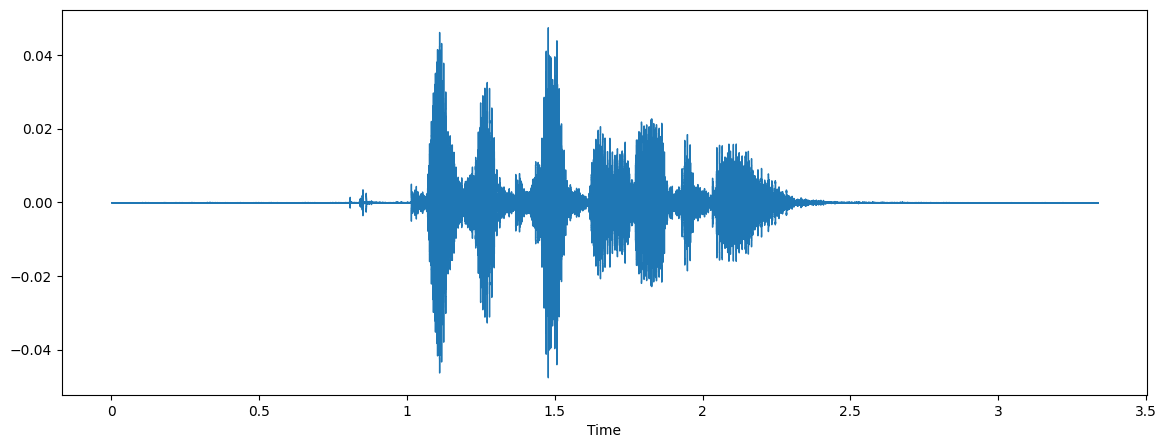

In [115]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sr)

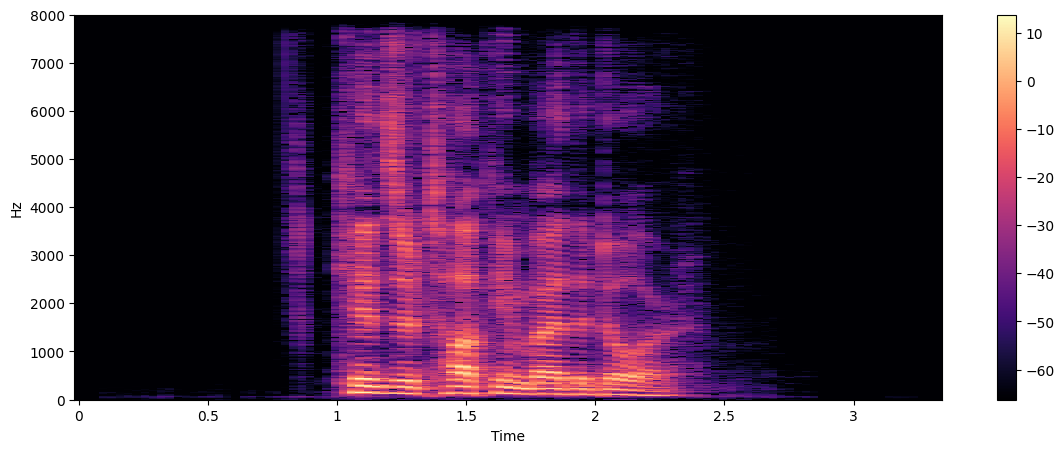

In [116]:
# spectrogram

X = librosa.stft(data) #short-time Fourier transform (STFT)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

(105,)


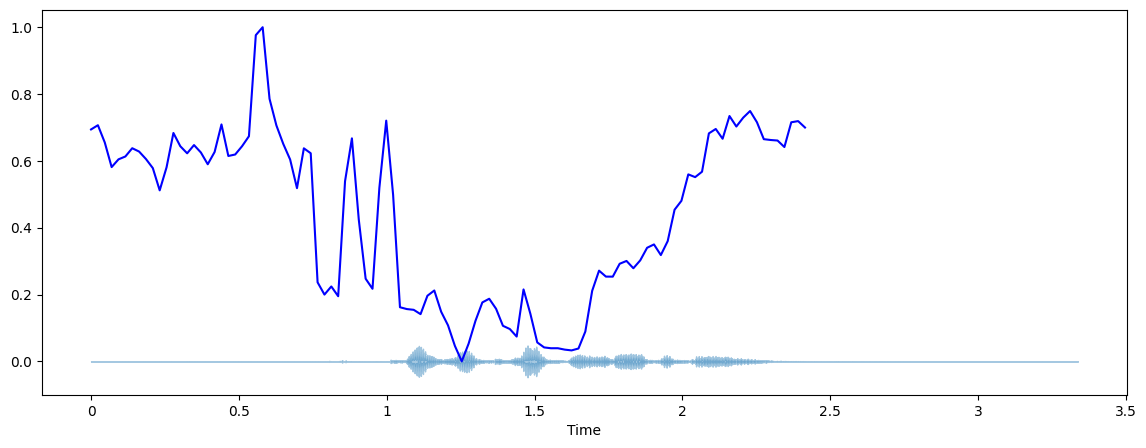

In [74]:
#Features Analysis, Spectral Centroid
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)[0]
print(spectral_centroids.shape)

#computing the time variable for visualization
plt.figure(figsize=(14,5))
frames = range(len(spectral_centroids))
t= librosa.frames_to_time(frames)

#normalizing the spectral centroids for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=0)
#plotting the spectral centroids along the waveform
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

In [119]:
#audio file types :
# .mp3:
# .flac:
# .wav: all data
import wave 

#audio signal parameters
#- number of channels: mono=1 sterio= 2
#- sample width: number of bytes for each sample
#- framerate/ sample_rate: frequancy means the number of samples for each second 
#- number of frames
#- values of a frame



obj = wave.open("audio_wave_rec/output_rec0.wav","rb") # read binery
print("number of channels", obj.getnchannels())
print("sample width", obj.getsampwidth())
print("frame rate", obj.getframerate())
print("number of frames", obj.getnframes())
print("parameters", obj.getparams())
#frames = obj.readframes(obj.getnframes())


audio_time = obj.getnframes() / obj.getframerate()
print("audio time", audio_time)

frames = obj.readframes(-1)
#print(frames.shape)


print(type(frames), type(frames[0]))
print(len(frames))# the 2*of print("number of frames", obj.getnframes()) cs -----> print("sample width", obj.getsampwidth()) 
obj.close()

obj_new = wave.open("audio_wave_rec/output_rec3.wav","wb")
obj_new.setnchannels(1)
obj_new.setsampwidth(2)
obj_new.setframerate(16000)

obj_new.writeframes(frames)
obj_new.close()






number of channels 1
sample width 2
frame rate 48000
number of frames 64534
parameters _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=64534, comptype='NONE', compname='not compressed')
audio time 1.3444583333333333
<class 'bytes'> <class 'int'>
129068


### TorchAudio: audio and signals processing with PyTorch

In [79]:
import torch
import torchaudio

waveform, sample_rate= torchaudio.load(path)
print(waveform.shape, sample_rate)

torch.Size([1, 160160]) 48000


In [80]:
#Resampling 
import torchaudio.transforms as T
import torchaudio.functional as F

waveform, sample_rate= torchaudio.load(path)

resample_rate= 32000
resmapled_waveform1= F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=12)
resmapled_waveform2= F.resample(waveform, sample_rate, resample_rate, resampling_method="kaiser_window")


/var/folders/dp/l_dvcrdd6vs676_54700jxw00000gn/T/ipykernel_10020/186935599.py:9: UserWarning: "kaiser_window" resampling method name is being deprecated and replaced by "sinc_interp_kaiser" in the next release. The default behavior remains unchanged.
  resmapled_waveform2= F.resample(waveform, sample_rate, resample_rate, resampling_method="kaiser_window")


In [81]:
#apply effects to file
def _plot(waveform, sample_rate, title):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis= torch.arange(0/num_frames)/ sample_rate
    figure, axes= plt.subplots(num_channels, 1)
    if num_channels==1:
        axes= [axes]
    for c in range(num_channels):
        if title=="Waveform":
            axes[c].plot(time_axis, waveform[c], linewidth=1)
            axes[c].grid(True)
        else:
            axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylable(f'Channel {c+1}')
    figure.suptitle(title)
    plt.show(block=False)
#.... To Be Centenued 

In [104]:
'''import torch
import torchaudio
from torchaudio.models import DeepSpeech
from torchaudio.datasets import LIBRISPEECH

# Define the Arabic alphabet manually
ARABIC_ALPHABET = "ابتثجحخدذرزسشصضطظعغفقكلمنهوي"

# Check if CUDA is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained DeepSpeech model
model = DeepSpeech(num_classes=len(ARABIC_ALPHABET)).to(device)

# Load a sample audio file (replace "path/to/your/audio.wav" with the actual path)
audio_file = "path/to/your/audio.wav"
waveform, sample_rate = torchaudio.load(audio_file)

# Preprocess the audio waveform
# DeepSpeech expects the input to have shape (batch_size, num_channels, num_samples)
waveform = waveform.unsqueeze(0).to(device)

# Perform inference
output = model(waveform)

# Decode the output to text
# Output is a sequence of character probabilities over time
# For simplicity, let's just take the argmax along the time axis
decoded_output = torch.argmax(output, dim=-1)

# Convert the indices to characters
# Assuming the indices directly correspond to Arabic alphabet
transcription = ''.join(ARABIC_ALPHABET[i] for i in decoded_output[0])

print("Transcription:", transcription)

'''


'import torch\nimport torchaudio\nfrom torchaudio.models import DeepSpeech\nfrom torchaudio.datasets import LIBRISPEECH\n\n# Define the Arabic alphabet manually\nARABIC_ALPHABET = "ابتثجحخدذرزسشصضطظعغفقكلمنهوي"\n\n# Check if CUDA is available and set device accordingly\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\n# Load pre-trained DeepSpeech model\nmodel = DeepSpeech(num_classes=len(ARABIC_ALPHABET)).to(device)\n\n# Load a sample audio file (replace "path/to/your/audio.wav" with the actual path)\naudio_file = "path/to/your/audio.wav"\nwaveform, sample_rate = torchaudio.load(audio_file)\n\n# Preprocess the audio waveform\n# DeepSpeech expects the input to have shape (batch_size, num_channels, num_samples)\nwaveform = waveform.unsqueeze(0).to(device)\n\n# Perform inference\noutput = model(waveform)\n\n# Decode the output to text\n# Output is a sequence of character probabilities over time\n# For simplicity, let\'s just take the argmax along the time axis\nde